In [5]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib
!pip install yellowbrick

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(5)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [6]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [7]:
# Set features. This will also be used as your x values.
selected_features = df.drop("koi_disposition", axis=1)
# selected_features.head()
selected_features.tail()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.01570,-0.01570,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.00017,-0.00017,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.00769,-0.00769,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.00285,-0.00285,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
6990,0,0,1,1,4.856035,6.360000e-05,-6.360000e-05,135.993300,0.01080,-0.01080,...,-225,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
from sklearn.model_selection import train_test_split

X = selected_features
y = df['koi_disposition'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [10]:
y

array(['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', ..., 'CANDIDATE',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

rf = RandomForestClassifier()
rf = rf.fit(X_train_scaled, y_train)
predictions = rf.predict(X_test_scaled)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8998855835240275


In [13]:
# Print Classification Report.
from sklearn.metrics import classification_report
# print(classification_report(rf.predict(X_test), y_test))
#lets change it to the shorter form >> classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.76      0.79       411
     CONFIRMED       0.83      0.85      0.84       484
FALSE POSITIVE       0.97      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.88      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



## Second Run

Write: 

Feature: 0, Score: 0.09511
Feature: 1, Score: 0.05653
Feature: 2, Score: 0.10609
Feature: 3, Score: 0.03458
Feature: 4, Score: 0.02449
Feature: 5, Score: 0.02000
Feature: 6, Score: 0.01916
Feature: 7, Score: 0.01495
Feature: 8, Score: 0.02397
Feature: 9, Score: 0.01863
Feature: 10, Score: 0.02052
Feature: 11, Score: 0.01155
Feature: 12, Score: 0.01116
Feature: 13, Score: 0.02252
Feature: 14, Score: 0.03422
Feature: 15, Score: 0.03650
Feature: 16, Score: 0.02095
Feature: 17, Score: 0.01549
Feature: 18, Score: 0.01460
Feature: 19, Score: 0.04264
Feature: 20, Score: 0.04529
Feature: 21, Score: 0.02813
Feature: 22, Score: 0.01639
Feature: 23, Score: 0.01622
Feature: 24, Score: 0.01716
Feature: 25, Score: 0.01181
Feature: 26, Score: 0.05689
Feature: 27, Score: 0.00278
Feature: 28, Score: 0.00967
Feature: 29, Score: 0.03028
Feature: 30, Score: 0.02823
Feature: 31, Score: 0.00882
Feature: 32, Score: 0.00912
Feature: 33, Score: 0.00992
Feature: 34, Score: 0.00973
Feature: 35, Score: 0.01235
Fe

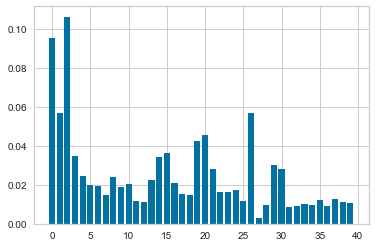

In [47]:
from matplotlib import pyplot as plt
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show(5)

### Selecting New Features

In [48]:
from matplotlib import pyplot as plt
ranked_features = sorted(zip(rf.feature_importances_, selected_features.columns.values), reverse=True)
ranked_features = pd.DataFrame(ranked_features)
ranked_features = ranked_features.nlargest(10, 0)
top_features = ranked_features[1].tolist()
top_features

# new_feautures.plot(kind='barh')
# plt.show()

['koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_nt',
 'koi_model_snr',
 'koi_duration_err1',
 'koi_prad_err1',
 'koi_prad',
 'koi_steff_err1',
 'koi_fpflag_ec',
 'koi_prad_err2']

In [34]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_co',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_model_snr',
 'koi_duration_err1',
 'koi_prad',
 'koi_steff_err1',
 'koi_prad_err2',
 'koi_prad_err1',
 'koi_fpflag_ec']]
# selected_features = df[[top_features]]
# # selected_features.head()
selected_features.tail()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_duration_err1,koi_prad,koi_steff_err1,koi_prad_err2,koi_prad_err1,koi_fpflag_ec
6986,0,0,0,8.4,0.6340,1.11,169,-0.23,0.32,1
6987,1,0,1,453.3,0.0174,29.35,139,-2.57,7.70,0
6988,0,0,0,10.6,0.2290,0.72,165,-0.08,0.24,0
6989,1,0,0,12.3,0.1620,1.07,193,-0.11,0.36,0
6990,1,0,0,8.2,0.2830,1.05,158,-0.12,0.36,1


In [35]:
from sklearn.model_selection import train_test_split

X = selected_features
y = df['koi_disposition'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

rf = RandomForestClassifier()
rf = rf.fit(X_train_scaled, y_train)

print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8964530892448512


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [37]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [38]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=125, n_estimators=250, score=0.901, total=   2.8s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.904, total=   2.7s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.889, total=   2.8s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.883, total=   2.8s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.886, total=   2.8s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.907, total=   3.3s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.905, total=   3.2s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.883, total=   3.3s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.881, total=   3.2s
[CV] max_depth=125, n_estimators=300 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.5min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [125, 150, 175],
                         'n_estimators': [250, 300, 350]},
             verbose=3)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 125, 'n_estimators': 350}
0.8931872594037216


In [40]:
# Training score:
grid.score(X_train_scaled, y_train)

1.0

In [41]:
# Testing score:
grid.score(X_test_scaled, y_test)

0.9010297482837528

In [42]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test_scaled)

In [43]:
# Print Classification Report.
from sklearn.metrics import classification_report
# print(classification_report(rf.predict(X_test), y_test))
#lets change it to the shorter form >> classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.75      0.79       411
     CONFIRMED       0.84      0.86      0.85       484
FALSE POSITIVE       0.96      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.88      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



# Save the Model

In [44]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'humberto_leon_randomforest.sav'
joblib.dump(rf, filename)

['humberto_leon_randomforest.sav']

### Making charts

/Users/umbertoleone/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


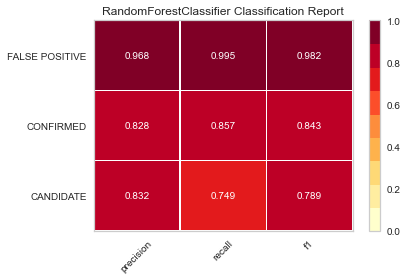

In [45]:
%matplotlib inline
import yellowbrick.classifier
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix
viz = ClassificationReport(RandomForestClassifier())
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.finalize()
viz.show(outpath="randomforest_classificationreport.png")